# Projeto de ICD - Dota 2

#### Alunos:
    Gabriel Henrique
    Matheus Vargas
    Raydan Gaspar

1. Definir Tema e grupo. (2pts) ✔️
2. Discussão com Monitores. (3pts) ✔️
3. Relatório Final. Entregue um relatório sobre os resultados que você levantou para responder às suas perguntas. Sua análise dos dados devem apresentar:
    * Uma caracterização (análise exploratória) inicial dos dados (2pts)
    * Pelo menos, dois testes de hipótese/intervalos de confiança (2pts)
        * Os ICs podem ser apresentados nos resultados de regressão e classificação abaixo.
        * Os testes de hipótese também podem ser utilizados abaixo para comparar modelos.
    * Pelo menos uma regressão (3pts)
    * Pelo menos um algoritmo de aprendizado/classificação (3pts)
4. No seu relatório, você deve apresentar pelo menos os seguintes pontos:
 * Introdução com Motivação e Pergunta de Pesquisa
 * Metodologia
 * Descreva sua base
 * Quais métodos e modelos foram utilizados. Justifique os mesmos.
5. Resultados. Sugiro separar em
 * Caracterização (análise exploratória)
     * Testes de hipótese podem vir aqui.
 * Previsão (uma ou duas sub-seções dependendo dos modelos utilizados)
6. Conclusões
 * Responda sua pergunta pelo menos de forma evidencial.
7. Vídeo no Youtube 5 minutos. Pode ser um vídeo só dos slides!! Com as falas, claro. 5pts.

# Introdução

![](img/dota_logo.png)

# Tema

Dota 2 é um jogo eletrônico do gênero Multiplayer Online Battle Arena (MOBA, "arena de batalha multijogador online"), também conhecido como Action Real-Time Strategy (ARTS, "estratégia de ação em tempo real") onde o jogador controla um personagem em uma batalha entre dois times, cujo objetivo é derrotar a equipe adversária e, para isso, é, indispensavelmente, necessário destruir o Ancestral (Ancient), que, por sua vez, se localiza no centro da base inimiga. Cada base é defendida por torres e ondas de unidades (chamadas de creeps) que percorrem os caminhos principais do mapa (chamadas de trilhas, ou lanes) que levam à suas bases. Existem 3 trilhas no mapa do jogo, que por convenção são chamadas de trilha de cima (Top, atravessa a parte de cima do mapa), trilha do meio (Mid ou Middle, caminho que atravessa o centro do mapa) e trilha de baixo (Bot ou Bottom, caminho que atravessa a parte de baixo do mapa). 

Na imagem abaixo podemos ver o minimapa do Dota2 e ao lado um diagrama representando o layout de um jogo do gênero MOBA, onde os pontos roxos e rosas representam as torres de cada time, com exceção do maior ponto localizado nos cantos da imagem dentro de cada base, que representa o Ancient.

| <br><img src="img/minimaps.png" width=700px /> |
|:--:| 
| **Figura 1**: Minimapa do Dota 2 (esquerda) e layout padrão de jogos MOBA (direita) |


## Motivação

## Pergunta de Pesquisa

# Metodologia


# Descrição da base
Os dados foram coletados utilizando a API não oficial do jogo, chamada OpenDoTA, nela coletamos dados de várias partidas do ano de 2015, assim como os dados dos jogadores presentes em cada partida e todas as suas ações, como por exemplo as coordenadas das posições que o jogador passou durante a partida, o herói que escolheu, quantas vezes morreu, entre outros. Os dados coletados foram disponibilizados em formato json, e não em formato de tabelas como precisávamos, então foi preciso selecionar os dados que queríamos entre aqueles fornecidos pela API e montar um banco de dados a partir deles. 

Uma característica do formato json é usar o tipo abstrato de dados dicionário, que é composto de pares de chaves e valores, onde cada chave pode conter uma lista de outras chaves e seus valores, isso faz com que existam várias "sub-tabelas" nos dados, o que impossibilita a importação dos dados diretamente para um banco de dados convencional. Dessa forma, foram criadas tabelas separadas para cada conjunto de valores do json, sendo que cada tabela referencia o seu "pai" original através de chaves estrangeiras, dessa forma conseguimos manter a relação dos dados como era originalmente feito no json.

Um exemplo dos dados pode ser visto na imagem abaixo.

| ![](img/exemplo_json.png) |
|:--:| 
| **Figura 2**: Amostra dos dados coletados em formato json |

Alguns dados não podiam ser buscados através da API, como por exemplo os nomes e números identificadores de cada personagem ou item do jogo, que são informações constantes, que não mudam entre as partidas, mas precisávamos dessas informações uma vez que a maior parte dos dados é numérica, e não seria interessante ter apenas números, mas sim nomes e significados para que os dados fizessem mais sentido. Por fim encontramos esses dados também em formato json, compatíveis com os dados da API, o que fez com que ficasse mais natural a relação entre as informações.

A imagem abaixo mostra um exemplo dos dados constantes de itens do jogo, com o id e nome de cada item listado em formato json.

| ![](img/exemplo_constantes.png) | 
|:--:| 
| **Figura 3**:  Dados constantes do jogo, servem de referência para os dados das partidas |


# Métodos e modelos utilizados. 
Justifique os mesmos.

# Resultados


### Caracterização (análise exploratória)

### Testes de hipótese podem vir aqui.

### Previsão (uma ou duas sub-seções dependendo dos modelos utilizados)


# Conclusões
Responda sua pergunta pelo menos de forma evidencial.

# Vídeo no Youtube 5 minutos

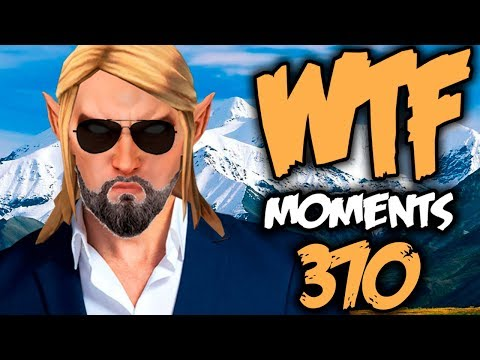

In [22]:
from IPython.display import YouTubeVideo
YouTubeVideo('2bCCk0xpurE')

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import io
import sqlite3

In [6]:
conn = sqlite3.connect('dota2_791_partidas.db')
cursor = conn.cursor()

### Consulta: Quantidade de mensagens ao longo da partida

Nesta consulta ao banco de dados, verificamos o tempo em que os jogadores acessam o chat durante a partida para se comunicarem. Para isso, consultamos o atributo "time" da tabela "chat" de todas as partidas e plotamos na forma de um histograma, e como a duração das partidas varia, plotamos a duração média das partidas para efeito de referência, consultando o atributo "duration" da tabela "match", e fazendo a média dos valores da duração de todas as partidas.

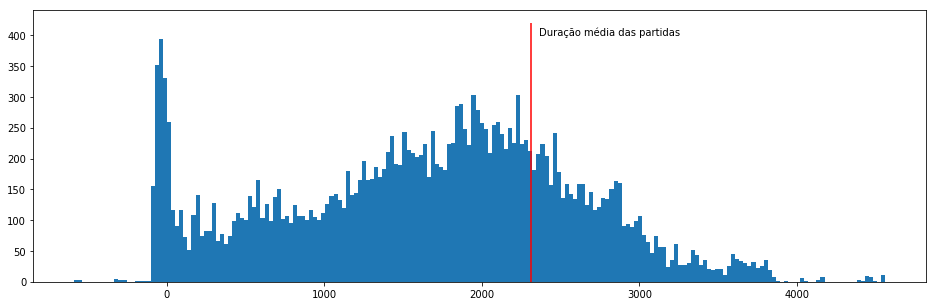

,time
21384,2198
21385,2199
21386,54
21387,605
21388,1670


In [10]:
df_chat = pd.read_sql_query(
'''
SELECT time
FROM chat
''', conn)

df_match_duration = pd.read_sql_query(
'''
SELECT AVG(duration)
FROM match
''', conn)

df_match_duration = df_match_duration.iloc[0][0]

plt.figure(figsize=(16,5))
plt.hist(df_chat['time'], bins=200)
plt.vlines(df_match_duration, 0, 420, color='red')
plt.text(df_match_duration+50, 400, 'Duração média das partidas')
plt.show()
df_chat.tail()

### Consulta: Posição nas lanes de acordo com cada time em uma partida específica

Para esta consulta fizemos duas seleções, uma para o time "Radiant" e outro para o "Dire", com o intuito 
de observar o posicionamento dos heróis em cada uma das equipes em uma partida de longa duração, específica da base de dados. 
Selecionamos as posições "x" e "y" visitadas por cada herói na partida e somamos as posições repetidas 
guardando-as em uma coluna separada, para assim mapearmos as posições mais visitadas pelos jogadores.
Para identificarmos de qual time cada jogador pertence, utilizamos a informação do atributo "pos_player_slot", 
que identica de 0 a 4 os jogadores do time "Radiant" e de 128 a 132 os jogadores do time "Dire".
    Para melhor visualização das posições mais visitadas pelos jogadores de cada time, plotamos dois mapas 
de calor com os dados, um para cada time.

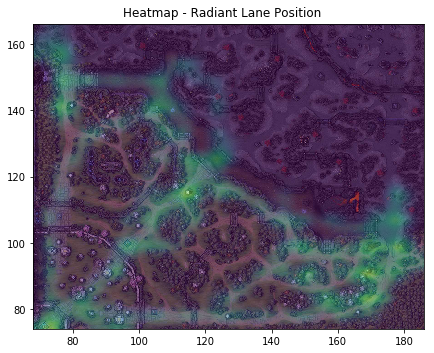

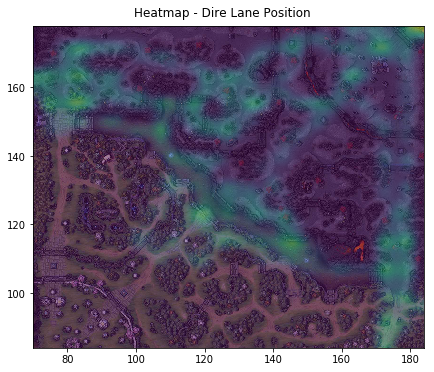

In [20]:
def dota2_heatmap(df, df_img, sizex, sizey, bins, name, title_height):
    img = plt.imread("Minimap_6.88.jpg")
    fig, ax = plt.subplots(figsize=(sizex,sizey))
    fig.suptitle(name, fontsize=12, y=title_height)
    ax.imshow(img, extent=[df_img['x'].min(), df_img['x'].max(), df_img['y'].min(), df_img['y'].max()])
    heatmap, xedges, yedges = np.histogram2d(df['x'], df['y'], bins=bins)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    ax.imshow(heatmap.T, extent=extent, origin='lower', alpha=0.5, interpolation='bicubic')

df_lane_radiant = pd.read_sql_query(
'''
SELECT x_pos x, y_pos y, sum(pos_count) count
FROM lane_pos 
WHERE pos_player_slot < 5 AND pos_match_id = 2001310590
GROUP BY x_pos, y_pos
''', conn)

dota2_heatmap(df_lane_radiant, df_obs, 7, 7, 35, 'Heatmap - Radiant Lane Position', 0.84)

df_lane_dire = pd.read_sql_query(
'''
SELECT x_pos x, y_pos y, sum(pos_count) count
FROM lane_pos 
WHERE pos_player_slot > 127 AND pos_match_id = 2001310590
GROUP BY x_pos, y_pos
''', conn)


dota2_heatmap(df_lane_dire, df_obs, 7, 7, 35, 'Heatmap - Dire Lane Position', 0.86)

### Consulta: Estatísticas relacionadas ao resultado das partidas

Essa consulta mostra a média de várias estatísticas dos jogadores, de acordo com o resultado das partidas, tanto para a vitória quanto para a derrota, com o objetivo de visualizar e comparar características e estratégias individuais e coletivas que influenciam um time à vitória ou à derrota.

In [13]:
df_radiant = pd.read_sql_query(
'''
SELECT REPLACE(REPLACE(radiant_win,0,"Derrota"),1,"Vitória") Resultado , (AVG(kills) - AVG(deaths)) "Saldo de Vítimas", 
AVG(hero_healing), AVG(tower_damage), AVG(hero_damage), AVG(gold_per_min), AVG(gold_spent), AVG(xp_per_min), AVG(denies), AVG(last_hits), AVG(level)
FROM match AS M
INNER JOIN(
    SELECT player_match_id, player_slot, kills, deaths, hero_healing, tower_damage, hero_damage, gold_per_min, xp_per_min, denies, last_hits, level, gold_spent
    FROM player
    WHERE player_slot < 5
) AS P
ON M.match_id = P.player_match_id
GROUP BY Resultado
ORDER BY Resultado DESC
''', conn)

df_radiant

,Resultado,Saldo de Vítimas,AVG(hero_healing),AVG(tower_damage),AVG(hero_damage),AVG(gold_per_min),AVG(gold_spent),AVG(xp_per_min),AVG(denies),AVG(last_hits),AVG(level)
0,Vitória,2.805276,590.573621,1999.218225,12477.882974,469.933333,14944.407674,485.431655,4.947242,122.921343,17.993765
1,Derrota,-3.648925,322.141398,371.974731,9850.920430,333.937634,10818.362903,371.886559,4.249462,107.705376,15.920968


### Consulta: Taxa de vitórias por herói

O objetivo desta consulta é verificar os heróis com maior taxa de vitória em todas partidas, utilizando o nome como fator de agrupamento dos dados. Para evitar heróis que estiveram pouco presente nas partidas, decidimos estabelecer que só entrariam heróis com mais de 100 partidas na base de dados, assim evitando dados enviesados, por exemplo, se um herói só foi escolhido uma vez e ganhou, sua taxa de vitória seria de 100%, mas isso não necessariamente condiz com a realidade. Para conseguirmos realizar esta consulta tivemos de realizar junção de três relações, tabelas "match", "player" e "heroes", e para calcular a taxa de vitória fizemos a soma do número de partidas vencedoras do herói dividido pelo número de partidas em que o herói foi selecionado.

In [14]:
df_winner_heroes = pd.read_sql_query(
'''
SELECT localized_name 'Hero Name', CAST(count(radiant_win) AS float)/CAST(M.num_matches AS float) WinRate
FROM match
INNER JOIN(
    SELECT player_match_id, localized_name, num_matches
    FROM player P
    INNER JOIN(
        SELECT hero_id, localized_name, num_matches
        FROM heroes
        INNER JOIN(
            SELECT hero_id n_id, count(hero_id) num_matches
            FROM player
            GROUP BY hero_id
        ) AS NUMP
        ON heroes.hero_id = NUMP.n_id
    ) AS H
    ON P.hero_id = H.hero_id
    WHERE player_slot < 5
) AS M
ON match_id = player_match_id
WHERE M.num_matches > 100
GROUP BY localized_name
ORDER BY WinRate DESC
''', conn)

df_winner_heroes.head(20)

,Hero Name,WinRate
0,Vengeful Spirit,0.626168
1,Alchemist,0.594203
2,Winter Wyvern,0.570248
3,Legion Commander,0.566929
4,Gyrocopter,0.565217
5,Crystal Maiden,0.532110
6,Juggernaut,0.530864
7,Invoker,0.528409
8,Dazzle,0.527607
9,Witch Doctor,0.527273


### Consulta: Herói mais escolhido em partidas rankeadas

As partidas rankeadas possuem como característica um ambiente mais competitivo entre os times, pois o resultado da partida gera pontos que classificam cada jogador individualmente em um ranking de habilidades, onde o time ganhador e os jogadores que mais se sobressaíram podem subir de nível e ser melhor classificados de acordo com suas habilidades. Nesses tipos de partidas, as estratégias de equipe são mais bem pensadas e os jogadores escolhem heróis que julgam ter melhores performances individuais ou em equipe, consequentemente, o nível de dificuldade da partida aumenta.
Diante deste contexto, esta consulta busca classificar a popularidade de escolha dos heróis para partidas rankeadas, do mais para o menos popular, e soma suas aparições nas partidas para melhor visualização.

In [15]:
df_most_picked_ranked = pd.read_sql_query(
'''
SELECT mode_name Modo, HR.hero_name Herói, count(HR.hero_name) Aparições
FROM match AS M
INNER JOIN(
    SELECT id, name mode_name 
    FROM lobby_type
    WHERE name = 'lobby_type_ranked'
) AS L
ON M.lobby_type = L.id
INNER JOIN(
    SELECT player_match_id, hero_id, hero_name
    FROM player AS P
    INNER JOIN(
        SELECT hero_id id, localized_name hero_name
        FROM heroes
    )AS H
    ON P.hero_id = H.id
)as HR
ON M.match_id = HR.player_match_id
GROUP BY HR.hero_name
ORDER BY Aparições DESC
''', conn)

df_most_picked_ranked.head()

,Modo,Herói,Aparições
0,lobby_type_ranked,Windranger,143
1,lobby_type_ranked,Shadow Fiend,135
2,lobby_type_ranked,Slardar,93
3,lobby_type_ranked,Invoker,87
4,lobby_type_ranked,Earthshaker,86


### Consulta: Proporção de Vítimas e Assistencias por Mortes por Herói

Uma forma de analisar o desempenho dos heróis na partida é analisar o seu KDA (kill, deaths, assists), quanto maior o seu KDA, melhor desempenho o herói teve na partida. Para se calcular esse índice devemos seguir essa fórmula: 

KDA = $(kills + assists)/MAX(1,deaths).$

Nesta consulta, calculamos o KDA de cada herói e fizemos a média em todas as partidas da base, e para melhor visualização dos melhores heróis de acordo com esse índice, ordenamos de forma descrescente a lista com todos os heróis do banco.

In [16]:
df_kda = pd.read_sql_query(
'''
SELECT hero_name 'Hero Name', sum(kills) Kills, sum(assists) Assists, sum(deaths) Deaths, (CAST(sum(kills) AS float)+CAST(sum(assists) AS float))/CAST(sum(deaths) AS float) "KDA Ratio"
FROM player AS P
INNER JOIN(
    SELECT hero_id id, localized_name hero_name
    FROM heroes
) AS H
ON P.hero_id = H.id
GROUP BY hero_id
ORDER BY "KDA Ratio" DESC
''', conn)

df_kda.head()

,Hero Name,Kills,Assists,Deaths,KDA Ratio
0,Spectre,584,1074,366,4.530055
1,Weaver,352,411,217,3.516129
2,Zeus,706,1253,561,3.491979
3,Ember Spirit,1142,1615,798,3.454887
4,Medusa,314,567,267,3.299625


### Consulta: Dano médio em torres de cada herói

O objetivo do jogo é destruir a torre "ancient" do time inimigo, para isso, é necessário que, no mínimo, todas as torres inimigas de uma das lanes (bot, mid, top) do mapa sejam completamente destruídas.
		
Então um fator que pode ser determinante para se vencer a partida é possuir heróis que desfiram golpes e magias que causem grande quantidade de dano nas torres inimigas.

Nesta consulta buscamos identificar os heróis que causam mais dano em média nas torres inimigas, e para enriquecer as características da consulta e dos heróis, selecionamos o atributo primário do herói (força, agilidade ou inteligência) e também sua forma de ataque (melee ou ranged).

In [17]:
df_kda = pd.read_sql_query(
'''
SELECT hero_name "Hero Name", primary_attr "Primary Attribute", attack_type "Attack Type", AVG(tower_damage) "Average Tower Damage per Match"
FROM player AS P
INNER JOIN(
    SELECT hero_id id, localized_name hero_name, primary_attr, attack_type
    FROM heroes
)AS H
ON P.hero_id = H.id
GROUP BY hero_id
ORDER BY "Average Tower Damage per Match" DESC
''', conn)

df_kda.head(20)

,Hero Name,Primary Attribute,Attack Type,Average Tower Damage per Match
0,Lycan,str,Melee,3995.241379
1,Clinkz,agi,Ranged,3248.538462
2,Lone Druid,agi,Ranged,3180.272727
3,Drow Ranger,agi,Ranged,3081.433962
4,Terrorblade,agi,Melee,3061.645161
5,Shadow Fiend,agi,Ranged,2912.117188
6,Meepo,agi,Melee,2791.333333
7,Death Prophet,int,Ranged,2760.620690
8,Juggernaut,agi,Melee,2694.820988
9,Luna,agi,Ranged,2694.676471


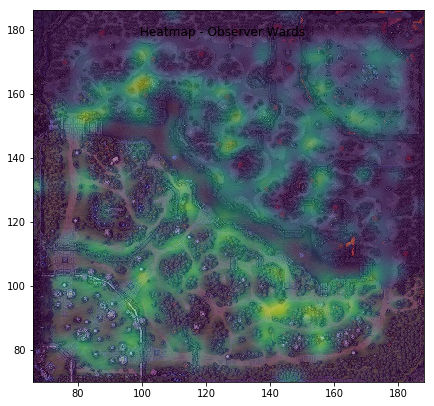

In [21]:
df_obs = pd.read_sql_query(
'''
SELECT x_pos x, y_pos y, sum(obs_count) count 
FROM obs 
GROUP BY x_pos, y_pos 
ORDER BY count DESC 
''', conn)

df_obs.head(10)

dota2_heatmap(df_obs, df_obs, 7, 7, 35, 'Heatmap - Observer Wards', 0.84)